# Analyzing Employee Exit Surveys
In this project,  I will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia to understand the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

I will combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

## Reading and Exploring the Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey = pd.read_csv('dete_survey.csv')

tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

``
The tafe_survey DataFrame has wordy columns which I will rename for ease of accessibility. Also, the dataset has some columns with very low number of non-null values. Going forward, I will see whether dropping of the column is feasible in light of the questions I aim to answer. 
``

## Dropping Columns and Specifying NaN

In [5]:
#Converting 'Not Stated' to NaN values
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#removing irrelevant columns from the two datesets
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49])
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[28:49])

``
Above, I read in 'Not Stated' as null values for the dete_survey dataset and also dropped redundant columns.
``

## Standardizing Column Names for the Datasets

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_') 
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated.rename(columns={'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender':'gender', 'CurrentAge. Current Age':'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}, inplace=True)

tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Dropping Rows

Since I am only interested in employees that resigned, I will be dropping rows that the seperationtype column is not resignation

In [8]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [10]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']==('Resignation-Other reasons' or 'Resignation-Other employer' or 'Resignation-Move overseas/interstate')].reset_index()

dete_resignations.head()

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']==('Resignation')].reset_index()

tafe_resignations.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


``
In the cells above, I used boolean indexing to remove the rows that are not pertinent to the analysis and rename them.
``

## Verifying the Data

In [12]:
dete_resignations['cease_date'].value_counts()

2012       63
2013       37
06/2013     9
12/2013     7
09/2013     6
07/2013     5
01/2014     4
11/2013     4
08/2013     3
05/2012     2
10/2013     2
05/2013     2
07/2012     1
Name: cease_date, dtype: int64

In [13]:
year = r"[0-2]?[0-8]?/?(?P<year>[2][0][1][2-3])"

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year).astype(float)

In [14]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    5
2012.0    8
2011.0    9
2010.0    8
2009.0    4
2008.0    9
2007.0    6
2006.0    9
2005.0    7
2004.0    7
2003.0    2
2002.0    2
2001.0    1
2000.0    6
1999.0    4
1998.0    5
1997.0    2
1996.0    4
1995.0    2
1994.0    3
1993.0    5
1992.0    5
1991.0    2
1990.0    3
1989.0    2
1988.0    1
1987.0    1
1986.0    1
1985.0    1
1984.0    1
1983.0    2
1980.0    4
1976.0    2
1974.0    2
1973.0    1
1972.0    1
1963.0    1
Name: dete_start_date, dtype: int64

In [15]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

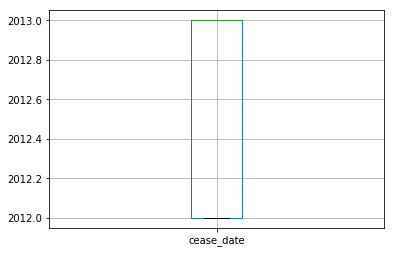

In [16]:
dete_resignations.boxplot('cease_date')

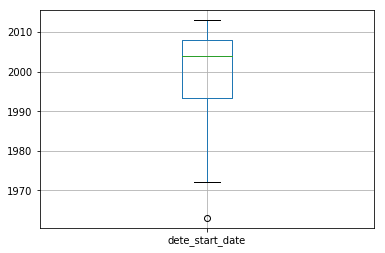

In [17]:
dete_resignations.boxplot('dete_start_date')

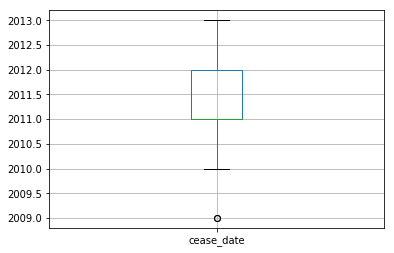

In [18]:
tafe_resignations.boxplot('cease_date')

``
In the cells above, I extracted the year of resignation from the dete file and converted it to a float data so that it can be more accessible for analysis.
From drawing the boxplot, I was also able to glean that there are some non-conforming values in the tafe file cease_date column and the dete_start_date column in the dete file.
``

## Creating Years of Service Column in DETE

In [19]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

``
By subtracting the two columns containing the year the employee resumed and the year he/she resigned, I was able to introduce the number of years he/she worked with the DETE institute. 
``

## Identifying Dissatisfied Employees

In [20]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [21]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [22]:
def update_vals(col):
    if pd.isnull(col) is True:
        return np.nan
    elif col is '-':
        return False
    else:
        return True

In [23]:
tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals)

In [24]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].any(axis=1, skipna=False) 

In [25]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)

``
In the section above, I used a function to convert two columns in the TATE file to a boolean type values. Then, I used the any() method to create a new column for both files to determine which employee left because of dissatisfaction.
``

## Combining the Dataset

In [26]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [27]:
#Joining the DataFrames

combined=pd.concat([tafe_resignations, dete_resignations], join='inner', ignore_index=True)

In [28]:
combined.head()

,index,id,cease_date,separationtype,age,employment_status,position,institute_service,dissatisfied,institute
0,3,6.341399e+17,2010.0,Resignation,NaN,NaN,NaN,NaN,False,TAFE
1,4,6.341466e+17,2010.0,Resignation,41 45,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE
2,5,6.341475e+17,2010.0,Resignation,56 or older,Contract/casual,Teacher (including LVT),7-10,False,TAFE
3,6,6.341520e+17,2010.0,Resignation,20 or younger,Temporary Full-time,Administration (AO),3-4,False,TAFE
4,7,6.341537e+17,2010.0,Resignation,46 50,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE


In [29]:
combined.tail()

,index,id,cease_date,separationtype,age,employment_status,position,institute_service,dissatisfied,institute
485,789,791.0,NaN,Resignation-Other reasons,51-55,Permanent Part-time,"School Based Professional Staff (Therapist, nu...",NaN,False,DETE
486,790,792.0,NaN,Resignation-Other reasons,36-40,Permanent Full-time,Teacher,NaN,True,DETE
487,791,793.0,NaN,Resignation-Other reasons,46-50,Permanent Part-time,Public Servant,NaN,True,DETE
488,807,809.0,2013.0,Resignation-Other reasons,36-40,Permanent Full-time,Teacher,9,True,DETE
489,808,810.0,2013.0,Resignation-Other reasons,26-30,Permanent Part-time,Teacher Aide,3,False,DETE


``
Above, I combined the two dataset using inner joins to provide similar columns needed for analysis.
``

## Cleaning the institute_service Column

In [30]:
combined['institute_service'].value_counts(dropna=False)

Less than 1 year      73
NaN                   71
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
1.0                   10
0.0                    9
3.0                    9
5.0                    8
9.0                    7
6.0                    7
13.0                   7
8.0                    6
7.0                    6
4.0                    5
17.0                   5
20.0                   5
14.0                   4
15.0                   4
2.0                    3
18.0                   3
21.0                   3
12.0                   2
39.0                   2
36.0                   2
32.0                   2
22.0                   2
16.0                   2
24.0                   2
19.0                   2
23.0                   2
26.0                   1
11.0                   1
25.0                   1
28.0                   1
30.0                   1
33.0                   1


In [31]:
combined['institute_service'].astype(str, inplace=True)

pattern = r"([0-9]+)"
combined['institute_service'] = combined['institute_service'].str.extract(pattern).astype(float)

def career_stage(col):
    if pd.isnull(col) is True:
        pass
    elif col < 3.0:
        return 'New'
    elif 3.0 <= col <= 6.0:
        return 'Experienced'
    elif (7.0 <= col) and (col <= 10.0):
        return 'Established'
    else:
        return 'Veteran'

In [32]:
combined['service_cat'] = combined['institute_service'].apply(career_stage)

In [33]:
combined.head()

,index,id,cease_date,separationtype,age,employment_status,position,institute_service,dissatisfied,institute,service_cat
0,3,6.341399e+17,2010.0,Resignation,NaN,NaN,NaN,NaN,False,TAFE,None
1,4,6.341466e+17,2010.0,Resignation,41 45,Permanent Full-time,Teacher (including LVT),3.0,False,TAFE,Experienced
2,5,6.341475e+17,2010.0,Resignation,56 or older,Contract/casual,Teacher (including LVT),7.0,False,TAFE,Established
3,6,6.341520e+17,2010.0,Resignation,20 or younger,Temporary Full-time,Administration (AO),3.0,False,TAFE,Experienced
4,7,6.341537e+17,2010.0,Resignation,46 50,Permanent Full-time,Teacher (including LVT),3.0,False,TAFE,Experienced


``
Above, I did the categorization of the rows based on a particular number of years the employees worked before resigning. This would be the basis of the aggregation that I would be doing next.
``

## Analysis

In [34]:
combined['dissatisfied'].value_counts(dropna=False)

False    302
True     180
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
combined['dissatisfied'].fillna(True, inplace=True)

In [36]:
combined['service_cat'].value_counts(dropna=False)

NaN            200
New            137
Experienced     96
Veteran         36
Established     21
Name: service_cat, dtype: int64

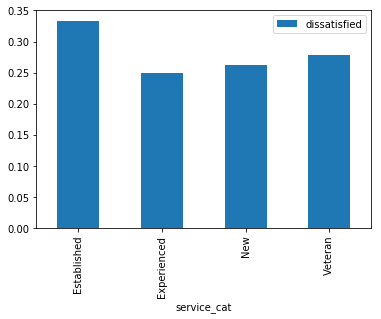

In [38]:
combined.pivot_table(values='dissatisfied', index='service_cat').plot(kind='bar')

``
Based on the bar plot above, I can conclude, tentatively, that workers with years of experience more than 7 are most likely to leave due to some kind of dissatisfaction. To assertively say this, the missing data still needs to be handled. 
``